In [1]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
x = df[["Glucose", "BloodPressure","BMI"]]
y = df["Outcome"]

In [6]:
x.head()

,Glucose,BloodPressure,BMI
0,148,72,33.6
1,85,66,26.6
2,183,64,23.3
3,89,66,28.1
4,137,40,43.1


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(x,y)

In [10]:
#prediction
model.predict([[120,70,33]])

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [11]:
#accuracy check
#by splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = DecisionTreeClassifier().fit(x_train,y_train)
#predicting the test set results
y_pred = model.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.6623376623376623


In [12]:
#how to save your trained model
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

model = DecisionTreeClassifier().fit(x,y)
joblib.dump(model, 'diabetic.joblib')

['diabetic.joblib']

In [15]:
# load your saved model
model = joblib.load('diabetic.joblib')
model.predict([[160,77,33]])

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x, y)

# Ensure class labels are converted to strings
class_names = [str(label) for label in sorted(y.unique())]

print("Class names:", class_names)

# Export the decision tree graph
tree.export_graphviz(model, 
                     out_file="diabetes.dot",  # Export as .dot file
                     feature_names=["Glucose", "BloodPressure", "BMI"],  # Feature names
                     class_names=class_names,  # Class names as strings
                     label='all', 
                     rounded=True,
                     filled=True)
print("Decision tree exported to diabetes.dot")

Class names: ['0', '1']
Decision tree exported to diabetes.dot


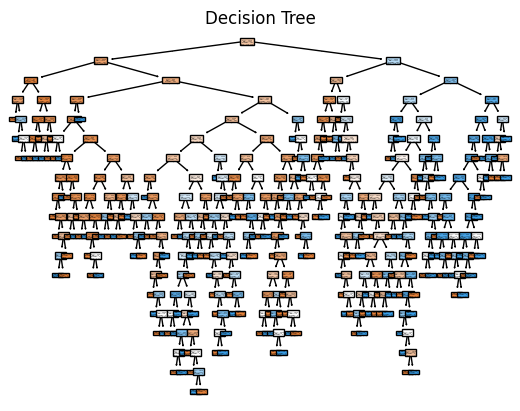

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x,y)
plot_tree(model, filled=True)
plt.title("Decision Tree")
plt.show()